In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data('/Users/cuixingqi/MNIST/mnist.npz')

print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


In [3]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


print(x_train.shape, type(x_train))
print(x_test.shape, type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


In [4]:
# 将数据类型转换为float32
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


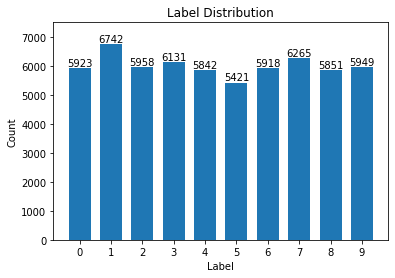

In [6]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)

plt.show()

In [7]:
# one-hot标签
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [8]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 使用Keras sequential model 定义 MNIST CNN 网络

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
## Feature Extraction
# 第1层卷积，二维卷积，32个3x3的卷积核 ，激活函数使用 relu
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))

# 第2层卷积，64个3x3的卷积核，激活函数使用 relu
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 最大池化层，池化窗口 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout 25% 的输入神经元
model.add(Dropout(0.25))

# 将 Pooled feature map 摊平后输入全连接网络
model.add(Flatten())

## Classification
# 全联接层
model.add(Dense(128, activation='relu'))

# Dropout 50% 的输入神经元
model.add(Dropout(0.5))

# 使用 softmax 激活函数做多分类，输出各数字的概率
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



## 查看 MNIST CNN 模型网络结构

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [21]:
 for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 26, 26, 32]
[None, 24, 24, 64]
[None, 12, 12, 64]
[None, 12, 12, 64]
[None, None]
[None, 128]
[None, 128]
[None, 10]


In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 50s - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0265 - val_accuracy: 0.9910
Epoch 2/5
 - 49s - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0278 - val_accuracy: 0.9916
Epoch 3/5
 - 50s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 4/5
 - 50s - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0257 - val_accuracy: 0.9923
Epoch 5/5
 - 49s - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0270 - val_accuracy: 0.9925


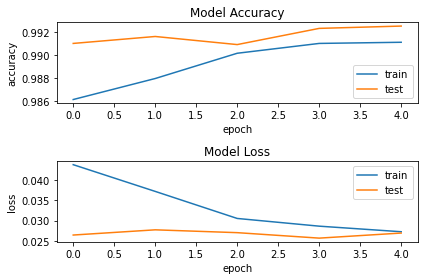

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

In [26]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "./mnist/model/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./mnist/model/keras_mnist.h5 


In [27]:
# 加载模型
from keras.models import load_model

mnist_model = load_model(model_path)

In [28]:
# 模型在统计分类器上的结果
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
# incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)
print("Classified correctly count: {}".format(len(correct_indices)))
# print("Classified incorrectly count: {}".format(len(incorrect_indices)))
print("Classified incorrectly count: {}".format(incorrect_indices))
type(incorrect_indices)

Test Loss: 0.02696340941905328
Test Accuracy: 99.25000071525574%
Classified correctly count: 9925
Classified incorrectly count: (array([ 321,  340,  445,  583,  738,  846,  924,  947, 1014, 1039, 1226,
       1232, 1242, 1260, 1393, 1522, 1530, 1549, 1709, 1878, 1901, 2035,
       2098, 2109, 2118, 2130, 2135, 2182, 2293, 2462, 2488, 2597, 2654,
       2770, 2896, 2927, 2939, 3289, 3422, 3503, 3520, 3558, 3727, 3778,
       3780, 3808, 3853, 3941, 4176, 4205, 4360, 4497, 4639, 4740, 4761,
       4807, 4823, 4860, 5937, 5955, 5997, 6576, 6597, 6625, 6651, 8246,
       8527, 9009, 9015, 9634, 9664, 9679, 9692, 9729, 9792]),)


tuple